# Data Cleaning + Analysis, Feature Engineering

Welcome back to the `Balling with Data` project, as we get underway into analyzing the data we've just extracted from the `sportsreference` package! Let's get right into it.

In [2]:
# Standard imports
# If any of these don't work, try doing `pip install _____`, or try looking up the error message.
import numpy as np
import pandas as pd
import json
import time
import os.path
from os import path
import math
import datetime
# import unidecode
import requests
from bs4 import BeautifulSoup

# Table of Contents

# Let's Get Cleaning!

In order for us to get into the heavy-lifting of the project (the predicting), we have to know what our data is composed of beforehand, otherwise we'll be predicting blindly. So, let's take a look at our dataset and see if there's anything interesting that we end up finding!

In [30]:
data = pd.read_csv("all_player_data.csv")
data.head()

,Unnamed: 0,name,NBA_and_ones,NBA_assist_percentage,NBA_assists,NBA_block_percentage,NBA_blocking_fouls,NBA_blocks,NBA_box_plus_minus,NBA_center_percentage,...,NCAAB_true_shooting_percentage,NCAAB_turnover_percentage,NCAAB_turnovers,NCAAB_two_point_attempts,NCAAB_two_point_percentage,NCAAB_two_pointers,NCAAB_usage_percentage,NCAAB_weight,NCAAB_win_shares,NCAAB_win_shares_per_40_minutes
0,0,Landry Fields,NaN,9.0,155.0,0.5,NaN,17.0,0.6,0,...,0.560,11.7,83.0,420.0,0.521,219.0,31.5,215,6.0,0.206
1,1,Andy Rautins,NaN,18.7,3.0,0.0,NaN,0.0,-16.0,0,...,0.632,22.6,98.0,56.0,0.571,32.0,18.4,195,4.9,0.173
2,2,Patrick Patterson,NaN,7.6,41.0,3.0,NaN,37.0,0.5,0,...,0.624,8.6,41.0,305.0,0.626,191.0,18.0,235,7.0,0.223
3,3,Gani Lawal,NaN,0.0,0.0,0.0,NaN,0.0,-4.9,0,...,0.547,15.3,78.0,324.0,0.531,172.0,26.1,234,4.1,0.177
4,4,Cole Aldrich,NaN,4.0,4.0,3.6,NaN,7.0,-0.8,0,...,0.596,14.1,56.0,265.0,0.562,149.0,19.9,245,5.9,0.245


First, let's clean up our dataset. As you can see, there's clearly some NaN values and a random "Unnamed: 0" column, both of which won't do for our models. Let's take care of them.

In [31]:
# We can use the .drop method to drop the erroneous 'Unnamed: 0' column
# Don't run this over and over because you'll run into an error of
# trying to delete a column that doesn't exist (we set inplace=True)
data.drop(columns=['Unnamed: 0'], inplace=True)
data.head()

,name,NBA_and_ones,NBA_assist_percentage,NBA_assists,NBA_block_percentage,NBA_blocking_fouls,NBA_blocks,NBA_box_plus_minus,NBA_center_percentage,NBA_defensive_box_plus_minus,...,NCAAB_true_shooting_percentage,NCAAB_turnover_percentage,NCAAB_turnovers,NCAAB_two_point_attempts,NCAAB_two_point_percentage,NCAAB_two_pointers,NCAAB_usage_percentage,NCAAB_weight,NCAAB_win_shares,NCAAB_win_shares_per_40_minutes
0,Landry Fields,NaN,9.0,155.0,0.5,NaN,17.0,0.6,0,0.1,...,0.560,11.7,83.0,420.0,0.521,219.0,31.5,215,6.0,0.206
1,Andy Rautins,NaN,18.7,3.0,0.0,NaN,0.0,-16.0,0,-4.3,...,0.632,22.6,98.0,56.0,0.571,32.0,18.4,195,4.9,0.173
2,Patrick Patterson,NaN,7.6,41.0,3.0,NaN,37.0,0.5,0,0.5,...,0.624,8.6,41.0,305.0,0.626,191.0,18.0,235,7.0,0.223
3,Gani Lawal,NaN,0.0,0.0,0.0,NaN,0.0,-4.9,0,0.5,...,0.547,15.3,78.0,324.0,0.531,172.0,26.1,234,4.1,0.177
4,Cole Aldrich,NaN,4.0,4.0,3.6,NaN,7.0,-0.8,0,2.6,...,0.596,14.1,56.0,265.0,0.562,149.0,19.9,245,5.9,0.245


In [39]:
# Find all the columns with NaN values in them
nan_col = data.columns[data1.isna().any()].tolist()
nan_col

['NBA_and_ones',
 'NBA_blocking_fouls',
 'NBA_effective_field_goal_percentage',
 'NBA_field_goal_perc_sixteen_foot_plus_two_pointers',
 'NBA_field_goal_perc_ten_to_sixteen_feet',
 'NBA_field_goal_perc_three_to_ten_feet',
 'NBA_field_goal_perc_zero_to_three_feet',
 'NBA_field_goal_percentage',
 'NBA_free_throw_attempt_rate',
 'NBA_free_throw_percentage',
 'NBA_lost_ball_turnovers',
 'NBA_net_plus_minus',
 'NBA_offensive_fouls',
 'NBA_on_court_plus_minus',
 'NBA_other_turnovers',
 'NBA_passing_turnovers',
 'NBA_percentage_field_goals_as_dunks',
 'NBA_percentage_of_three_pointers_from_corner',
 'NBA_percentage_shots_three_pointers',
 'NBA_percentage_shots_two_pointers',
 'NBA_percentage_sixteen_foot_plus_two_pointers',
 'NBA_percentage_ten_to_sixteen_footers',
 'NBA_percentage_three_to_ten_footers',
 'NBA_percentage_zero_to_three_footers',
 'NBA_points_generated_by_assists',
 'NBA_position',
 'NBA_salary',
 'NBA_shooting_distance',
 'NBA_shooting_fouls',
 'NBA_shooting_fouls_drawn',
 'NBA

Now, let's take a look at the dataset with all the NaN values.

In [35]:
data[nan_col].head()

,NBA_and_ones,NBA_blocking_fouls,NBA_effective_field_goal_percentage,NBA_field_goal_perc_sixteen_foot_plus_two_pointers,NBA_field_goal_perc_ten_to_sixteen_feet,NBA_field_goal_perc_three_to_ten_feet,NBA_field_goal_perc_zero_to_three_feet,NBA_field_goal_percentage,NBA_free_throw_attempt_rate,NBA_free_throw_percentage,...,NBA_three_pointers_assisted_percentage,NBA_true_shooting_percentage,NBA_turnover_percentage,NBA_two_point_percentage,NBA_two_pointers_assisted_percentage,NCAAB_box_plus_minus,NCAAB_defensive_box_plus_minus,NCAAB_offensive_box_plus_minus,NCAAB_player_efficiency_rating,NCAAB_three_point_percentage
0,NaN,NaN,0.568,0.433,0.318,0.297,0.729,0.497,0.244,0.769,...,1.0,0.598,13.8,0.556,0.582,NaN,NaN,NaN,NaN,0.337
1,NaN,NaN,0.500,1.000,NaN,NaN,0.000,0.429,0.286,0.500,...,1.0,0.508,47.0,0.667,1.000,NaN,NaN,NaN,NaN,0.407
2,NaN,NaN,0.558,0.524,0.490,0.490,0.687,0.558,0.157,0.714,...,NaN,0.574,9.8,0.562,0.711,NaN,NaN,NaN,NaN,0.348
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
4,NaN,NaN,0.533,NaN,NaN,0.222,1.000,0.533,0.267,0.500,...,NaN,0.537,32.3,0.533,0.375,NaN,NaN,NaN,NaN,NaN


With NaN (Not A Number) values, we can take a variety of different approaches to handle them so we can properly conduct our data analysis/modeling.

We can:
1. Replace values with a constant value
2. Replace values with a randomly selected value from the same feature
3. Replace values with the mean, median, or mode
4. Drop the row/column with the NaN value(s)

At this point, it's up to you for what kind of actions you'd like to perform to clean up these NaN columns from the data, but once you do so, assign it to `clean_data` to continue.

In [40]:
# Assign 'clean_data' to the clean dataset
clean_data = data.drop(columns=nan_col)
clean_data.head()

,name,NBA_assist_percentage,NBA_assists,NBA_block_percentage,NBA_blocks,NBA_box_plus_minus,NBA_center_percentage,NBA_defensive_box_plus_minus,NBA_defensive_rebound_percentage,NBA_defensive_rebounds,...,NCAAB_true_shooting_percentage,NCAAB_turnover_percentage,NCAAB_turnovers,NCAAB_two_point_attempts,NCAAB_two_point_percentage,NCAAB_two_pointers,NCAAB_usage_percentage,NCAAB_weight,NCAAB_win_shares,NCAAB_win_shares_per_40_minutes
0,Landry Fields,9.0,155.0,0.5,17.0,0.6,0,0.1,18.9,416.0,...,0.560,11.7,83.0,420.0,0.521,219.0,31.5,215,6.0,0.206
1,Andy Rautins,18.7,3.0,0.0,0.0,-16.0,0,-4.3,4.8,1.0,...,0.632,22.6,98.0,56.0,0.571,32.0,18.4,195,4.9,0.173
2,Patrick Patterson,7.6,41.0,3.0,37.0,0.5,0,0.5,14.9,114.0,...,0.624,8.6,41.0,305.0,0.626,191.0,18.0,235,7.0,0.223
3,Gani Lawal,0.0,0.0,0.0,0.0,-4.9,0,0.5,0.0,0.0,...,0.547,15.3,78.0,324.0,0.531,172.0,26.1,234,4.1,0.177
4,Cole Aldrich,4.0,4.0,3.6,7.0,-0.8,0,2.6,17.5,22.0,...,0.596,14.1,56.0,265.0,0.562,149.0,19.9,245,5.9,0.245


Great! Now that our dataset has been cleaned, let's take a closer look into breaking down the column types.

In [46]:
qual_col = clean_data.select_dtypes(['object']).columns.to_list()
qual_col

['name',
 'NBA_height',
 'NBA_nationality',
 'NBA_player_id',
 'NBA_team_abbreviation',
 'NCAAB_conference',
 'NCAAB_height',
 'NCAAB_player_id',
 'NCAAB_position',
 'NCAAB_team_abbreviation']

In [49]:
clean_data[qual_col].head()

,name,NBA_height,NBA_nationality,NBA_player_id,NBA_team_abbreviation,NCAAB_conference,NCAAB_height,NCAAB_player_id,NCAAB_position,NCAAB_team_abbreviation
0,Landry Fields,6-7,United States of America,fieldla01,NYK,pac-10,6-7,landry-fields-1,Guard,stanford
1,Andy Rautins,6-4,United States of America,rautian01,NYK,big-east,6-5,andy-rautins-1,Guard,syracuse
2,Patrick Patterson,6-8,United States of America,pattepa01,HOU,sec,6-9,patrick-patterson-1,Forward,kentucky
3,Gani Lawal,6-9,United States of America,lawalga01,PHO,acc,6-9,gani-lawal-1,Forward,georgia-tech
4,Cole Aldrich,6-11,United States of America,aldrico01,OKC,big-12,6-11,cole-aldrich-1,Center,kansas


From the table above, we can clearly see that some of the qualitative variables don't make too much sense to stick around/aren't important enough to keep (at least for purposes of this project). So, we can drop a few of these to help reduce the number of features we're dealing with in our dataset.

In [56]:
qual_drop = [
    'NBA_nationality',
    'NBA_player_id',
    'NBA_team_abbreviation',
    'NCAAB_conference', 
    'NBA_height', # we're going to assume height doesn't change much from NCAA to NBA
    'NCAAB_player_id',
    'NCAAB_team_abbreviation',
]

In [63]:
clean_data.drop(columns=qual_drop, inplace=True) # Only run this once

In [64]:
clean_data.head()

,name,NBA_assist_percentage,NBA_assists,NBA_block_percentage,NBA_blocks,NBA_box_plus_minus,NBA_center_percentage,NBA_defensive_box_plus_minus,NBA_defensive_rebound_percentage,NBA_defensive_rebounds,...,NCAAB_true_shooting_percentage,NCAAB_turnover_percentage,NCAAB_turnovers,NCAAB_two_point_attempts,NCAAB_two_point_percentage,NCAAB_two_pointers,NCAAB_usage_percentage,NCAAB_weight,NCAAB_win_shares,NCAAB_win_shares_per_40_minutes
0,Landry Fields,9.0,155.0,0.5,17.0,0.6,0,0.1,18.9,416.0,...,0.560,11.7,83.0,420.0,0.521,219.0,31.5,215,6.0,0.206
1,Andy Rautins,18.7,3.0,0.0,0.0,-16.0,0,-4.3,4.8,1.0,...,0.632,22.6,98.0,56.0,0.571,32.0,18.4,195,4.9,0.173
2,Patrick Patterson,7.6,41.0,3.0,37.0,0.5,0,0.5,14.9,114.0,...,0.624,8.6,41.0,305.0,0.626,191.0,18.0,235,7.0,0.223
3,Gani Lawal,0.0,0.0,0.0,0.0,-4.9,0,0.5,0.0,0.0,...,0.547,15.3,78.0,324.0,0.531,172.0,26.1,234,4.1,0.177
4,Cole Aldrich,4.0,4.0,3.6,7.0,-0.8,0,2.6,17.5,22.0,...,0.596,14.1,56.0,265.0,0.562,149.0,19.9,245,5.9,0.245


One thing you might notice is we didn't drop the `NCAAB_height` or `NCAAB_position` columns. Now, this was deliberate, as we'll be able to clean those columns up even further to incorporate them into our modeling.

## Categorical to Numerical

Now, a key takeaway from this entire data analysis is that working with categorical variables is very tedious/ineffective. It's difficult to run regression with them, and tough for models to differentiate a "scaling" with them (what defines one category to be better than the other, if there is a differentiation?) So, what we aim to do with categorical variables is **turn them into numerical ones**, or try to remove them from the dataset. As you've seen above, we've already removed a decent few from the dataset, and now we'll try to convert these following ones into numerical columns

`NCAAB_height`
`NCAAB_position`

Now, with height, we can easily apply a function to convert the heights stored in strings into integers that we can actually use.

In [71]:
def convert_height(height):
    """
    Convert height from string to int (6-11 -> 83)
    """
    # TODO
    return

In [66]:
clean_data['NCAAB_height'] = clean_data['NCAAB_height'].apply(convert_height) # Only run this once

In [68]:
clean_data.head()

,name,NBA_assist_percentage,NBA_assists,NBA_block_percentage,NBA_blocks,NBA_box_plus_minus,NBA_center_percentage,NBA_defensive_box_plus_minus,NBA_defensive_rebound_percentage,NBA_defensive_rebounds,...,NCAAB_true_shooting_percentage,NCAAB_turnover_percentage,NCAAB_turnovers,NCAAB_two_point_attempts,NCAAB_two_point_percentage,NCAAB_two_pointers,NCAAB_usage_percentage,NCAAB_weight,NCAAB_win_shares,NCAAB_win_shares_per_40_minutes
0,Landry Fields,9.0,155.0,0.5,17.0,0.6,0,0.1,18.9,416.0,...,0.560,11.7,83.0,420.0,0.521,219.0,31.5,215,6.0,0.206
1,Andy Rautins,18.7,3.0,0.0,0.0,-16.0,0,-4.3,4.8,1.0,...,0.632,22.6,98.0,56.0,0.571,32.0,18.4,195,4.9,0.173
2,Patrick Patterson,7.6,41.0,3.0,37.0,0.5,0,0.5,14.9,114.0,...,0.624,8.6,41.0,305.0,0.626,191.0,18.0,235,7.0,0.223
3,Gani Lawal,0.0,0.0,0.0,0.0,-4.9,0,0.5,0.0,0.0,...,0.547,15.3,78.0,324.0,0.531,172.0,26.1,234,4.1,0.177
4,Cole Aldrich,4.0,4.0,3.6,7.0,-0.8,0,2.6,17.5,22.0,...,0.596,14.1,56.0,265.0,0.562,149.0,19.9,245,5.9,0.245


However, we'll see that the position column isn't so easy to convert. Let's take a look at it again.

In [86]:
# Each type in this category and the number of each type
clean_data['NCAAB_position'].value_counts()

Guard             262
Forward           229
Center             34
Guard-Forward       5
Forward-Center      1
Center-Forward      1
Name: NCAAB_position, dtype: int64

In [88]:
# Taking a look at all the types with a '-' in them, or looking at Guard-Forward, Forward-Center, and Center-Forward
clean_data[clean_data['NCAAB_position'].str.contains("-")][['name', 'NCAAB_position']]

,name,NCAAB_position
415,Luke Kornet,Forward-Center
462,Jacob Evans,Guard-Forward
463,Kenrich Williams,Guard-Forward
467,Ángel Delgado,Center-Forward
508,Mikal Bridges,Guard-Forward
518,Duncan Robinson,Guard-Forward
531,Yuta Watanabe,Guard-Forward


From this analysis, we can clearly see two things:
1. There are much more Guards, Forwards, and Centers, than there are of the last 3 positions.
2. The different positions don't have any pre-defined order, so they don't necessarily follow any numerical standard. We could convert each position to its own respective number (0 -> Center, 1-> Center-Forward, ...), but that wouldn't make too much sense and could hurt model accuracy. For example, if we took the average of the column, the average might be 1 (which could correspond to Center-Forward), but we know that this might not be true because certain position types are weighted more than others.

Keeping these in mind, let's introduce a concept called **one-hot encoding** to try and help us with converting this column to a numerical type.

### One-Hot Encoding

**One-Hot Encoding** is a process we can follow to convert a categorical variable to a set of numerical ones (one for each possible type in the categorical variable), where each numerical variable is a `1` if the categorical variable was this type, and 0 otherwise. To make more sense of what this means, let's take a look at an example.

In [127]:
# Example data
ex_data = np.array([
    ['Blue', 'Bouncy', 5],
    ['Red', 'Not Bouncy', 3],
    ['Green', 'Medium Bouncy', 2],
    ['Red', 'Medium Bouncy', 6],
])
ex_df = pd.DataFrame(data=ex_data, columns=['Color', 'Bounciness', 'Diameter'])
ex_df

,Color,Bounciness,Diameter
0,Blue,Bouncy,5
1,Red,Not Bouncy,3
2,Green,Medium Bouncy,2
3,Red,Medium Bouncy,6


Now, let's say we're trying to predict how much a kid will like a certain bouncy ball given its color, bounciness, and diameter, and that the `Color` and `Bounciness` columns currently contain all the different possible values for their respective columns. We can see that color and bounciness are both categorical, making them difficult to use for modelling, but also a great use-case for **one-hot encoding**. So, let's apply it below with the helper method provided.

In [143]:
def one_hot_encoding(df, columns):
    """
    Converts given column names in df into one-hot encoded columns.
    Returns the given df dataframe with converted columns and removes the former ones included in `columns`
    """
    new_df = df.copy(deep=True)
    for col in columns:
        types = np.unique(new_df[col])
        for t in types:
            new_df[t] = (new_df[col] == t).apply(int)
    return new_df.drop(columns=columns)

In [144]:
one_hot_encoding(ex_df, columns=['Color', 'Bounciness'])

,Diameter,Blue,Green,Red,Bouncy,Medium Bouncy,Not Bouncy
0,5,1,0,0,1,0,0
1,3,0,0,1,0,0,1
2,2,0,1,0,0,1,0
3,6,0,0,1,0,1,0


As we can see, the `one_hot_encoding` method was able to remove the different categorical columns we provided, and replaced them with numerical columns, where they are a `1` or a `0` depending on whether or not that specific data point was or was not that category type beforehand. Now, we can use the numerical columns, and continue forward with our analysis!

**Why does this work?**

Now, if our models were to apply weights to different features, and say found that being `Blue` was a strong indicator of a kid liking the ball, then it'll be able to apply a strong weight to the `Blue` numerical column, without having to worry about the other categories.

**Quick Note:** As you can see, one-hot encoding may generate a lot of different features ontop of our dataset that might slow down computation/accuracy (especially if the category can only have two types, in which knowing if the datapoint is one type already tells us it's not the other). So, something we can do with our dataset is that because we know that there aren't many players with hyphened positions, we could *remove them* from the dataset, and then run our one-hot encoder. That way, we''ll be able to reduce the **sparsity** (columns with few useful data points), and reduce the number of features in our dataset, as these 3 new columns we'd generate would be mostly 0's anyways.

Now, knowing how one-hot encoding works and how we can ensure that it doesn't take over our dataset with sparsity/excessive complexity, let's apply it to `clean_data`!

In [135]:
# Drop the columns with the hyphened positions.
clean_data.drop(index=clean_data[clean_data['NCAAB_position'].str.contains("-")].index, inplace=True) # Only run this once

In [139]:
# Let's confirm they got dropped
np.unique(clean_data['NCAAB_position'])

array(['Center', 'Forward', 'Guard'], dtype=object)

In [146]:
# Now run one_hot_encoding on the position column
clean_data = one_hot_encoding(clean_data, columns=['NCAAB_position'])
clean_data.head()

,name,NBA_assist_percentage,NBA_assists,NBA_block_percentage,NBA_blocks,NBA_box_plus_minus,NBA_center_percentage,NBA_defensive_box_plus_minus,NBA_defensive_rebound_percentage,NBA_defensive_rebounds,...,NCAAB_two_point_attempts,NCAAB_two_point_percentage,NCAAB_two_pointers,NCAAB_usage_percentage,NCAAB_weight,NCAAB_win_shares,NCAAB_win_shares_per_40_minutes,Center,Forward,Guard
0,Landry Fields,9.0,155.0,0.5,17.0,0.6,0,0.1,18.9,416.0,...,420.0,0.521,219.0,31.5,215,6.0,0.206,0,0,1
1,Andy Rautins,18.7,3.0,0.0,0.0,-16.0,0,-4.3,4.8,1.0,...,56.0,0.571,32.0,18.4,195,4.9,0.173,0,0,1
2,Patrick Patterson,7.6,41.0,3.0,37.0,0.5,0,0.5,14.9,114.0,...,305.0,0.626,191.0,18.0,235,7.0,0.223,0,1,0
3,Gani Lawal,0.0,0.0,0.0,0.0,-4.9,0,0.5,0.0,0.0,...,324.0,0.531,172.0,26.1,234,4.1,0.177,0,1,0
4,Cole Aldrich,4.0,4.0,3.6,7.0,-0.8,0,2.6,17.5,22.0,...,265.0,0.562,149.0,19.9,245,5.9,0.245,1,0,0


Now, if you scroll towards the end of the dataframe above, you'll be able to see the new columns `Center`, `Forward`, and `Guard`. Congrats! You've officially learned about **one-hot encoding**, how to apply it to a dataset, and its use and implications.

# Data Analysis

Removing names for this section. Refer to `clean_data` for all the names

In [158]:
da_df = clean_data.copy(deep=True)
da_df = da_df.drop(columns=['name'])

In [159]:
from sklearn.preprocessing import StandardScaler

In [165]:
sc = StandardScaler()
cols = da_df.columns
for col in cols:
    da_df[col] = pd.to_numeric(da_df[col])
    da_df[[col]] = sc.fit_transform(da_df[[col]])
da_df.head()

,NBA_assist_percentage,NBA_assists,NBA_block_percentage,NBA_blocks,NBA_box_plus_minus,NBA_center_percentage,NBA_defensive_box_plus_minus,NBA_defensive_rebound_percentage,NBA_defensive_rebounds,NBA_defensive_win_shares,...,NCAAB_two_point_attempts,NCAAB_two_point_percentage,NCAAB_two_pointers,NCAAB_usage_percentage,NCAAB_weight,NCAAB_win_shares,NCAAB_win_shares_per_40_minutes,Center,Forward,Guard
0,-0.210703,1.239006,-0.499713,0.263171,0.910230,0.0,0.406147,0.541738,3.638891,1.862735,...,1.886301,0.002970,1.769552,1.575298,0.085184,0.765839,0.503596,-0.263147,-0.879573,1.001907
1,0.817277,-0.563891,-0.744487,-0.631269,-2.076687,0.0,-1.174644,-1.005533,-0.792716,-0.755957,...,-2.261729,0.832435,-2.067063,-1.390027,-0.714133,0.103755,-0.188849,-0.263147,-0.879573,1.001907
2,-0.359071,-0.113167,0.724159,1.315453,0.892237,0.0,0.549855,0.102796,0.413962,0.262423,...,0.575797,1.744846,1.195086,-1.480571,0.884501,1.367733,0.860310,-0.263147,1.136915,-0.998097
3,-1.164499,-0.599474,-0.744487,-0.631269,-0.079411,0.0,0.549855,-1.532264,-0.803395,-0.755957,...,0.792315,0.168863,0.805269,0.352950,0.844536,-0.377760,-0.104916,-0.263147,1.136915,-0.998097
4,-0.740590,-0.552030,1.017888,-0.262970,0.658321,0.0,1.304323,0.388109,-0.568466,-0.464991,...,0.119969,0.683131,0.333386,-1.050486,1.284160,0.705649,1.321940,3.800155,-0.879573,-0.998097


In [168]:
nba_col = [num for num in range(len(da_df.columns)) if 'NBA' in da_df.columns[num]]
ncaab_col = [num for num in range(len(da_df.columns)) if 'NCAAB' in da_df.columns[num]]

In [170]:
cols = da_df.iloc[:, nba_col].columns
for num in range(len(nba_col)):
    print(num, cols[num])

(0, 'NBA_assist_percentage')
(1, 'NBA_assists')
(2, 'NBA_block_percentage')
(3, 'NBA_blocks')
(4, 'NBA_box_plus_minus')
(5, 'NBA_center_percentage')
(6, 'NBA_defensive_box_plus_minus')
(7, 'NBA_defensive_rebound_percentage')
(8, 'NBA_defensive_rebounds')
(9, 'NBA_defensive_win_shares')
(10, 'NBA_dunks')
(11, 'NBA_field_goal_attempts')
(12, 'NBA_field_goals')
(13, 'NBA_free_throw_attempts')
(14, 'NBA_free_throws')
(15, 'NBA_games_played')
(16, 'NBA_games_started')
(17, 'NBA_half_court_heaves')
(18, 'NBA_half_court_heaves_made')
(19, 'NBA_minutes_played')
(20, 'NBA_offensive_box_plus_minus')
(21, 'NBA_offensive_rebound_percentage')
(22, 'NBA_offensive_rebounds')
(23, 'NBA_offensive_win_shares')
(24, 'NBA_personal_fouls')
(25, 'NBA_player_efficiency_rating')
(26, 'NBA_point_guard_percentage')
(27, 'NBA_points')
(28, 'NBA_power_forward_percentage')
(29, 'NBA_shooting_guard_percentage')
(30, 'NBA_small_forward_percentage')
(31, 'NBA_steal_percentage')
(32, 'NBA_steals')
(33, 'NBA_three_poin

In [169]:
cols = da_df.iloc[:, ncaab_col].columns
for num in range(len(ncaab_col)):
    print(num + len(nba_col), cols[num])

(45, 'NCAAB_assist_percentage')
(46, 'NCAAB_assists')
(47, 'NCAAB_block_percentage')
(48, 'NCAAB_blocks')
(49, 'NCAAB_defensive_rebound_percentage')
(50, 'NCAAB_defensive_rebounds')
(51, 'NCAAB_defensive_win_shares')
(52, 'NCAAB_effective_field_goal_percentage')
(53, 'NCAAB_field_goal_attempts')
(54, 'NCAAB_field_goal_percentage')
(55, 'NCAAB_field_goals')
(56, 'NCAAB_free_throw_attempt_rate')
(57, 'NCAAB_free_throw_attempts')
(58, 'NCAAB_free_throw_percentage')
(59, 'NCAAB_free_throws')
(60, 'NCAAB_games_played')
(61, 'NCAAB_games_started')
(62, 'NCAAB_height')
(63, 'NCAAB_minutes_played')
(64, 'NCAAB_offensive_rebound_percentage')
(65, 'NCAAB_offensive_rebounds')
(66, 'NCAAB_offensive_win_shares')
(67, 'NCAAB_personal_fouls')
(68, 'NCAAB_points')
(69, 'NCAAB_points_produced')
(70, 'NCAAB_steal_percentage')
(71, 'NCAAB_steals')
(72, 'NCAAB_three_point_attempt_rate')
(73, 'NCAAB_three_point_attempts')
(74, 'NCAAB_three_pointers')
(75, 'NCAAB_total_rebound_percentage')
(76, 'NCAAB_total

In [171]:
nba_i = [1, 3, 4, 11, 12, 15, 25, 27, 32, 34, 36, 37]
ncaa_i = [46, 48, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 67, 70, 72, 73, 75, 78, 79, 80, 85]

In [173]:
important = da_df.iloc[:, nba_i + ncaa_i]

In [174]:
corr = important.corr()

In [182]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns

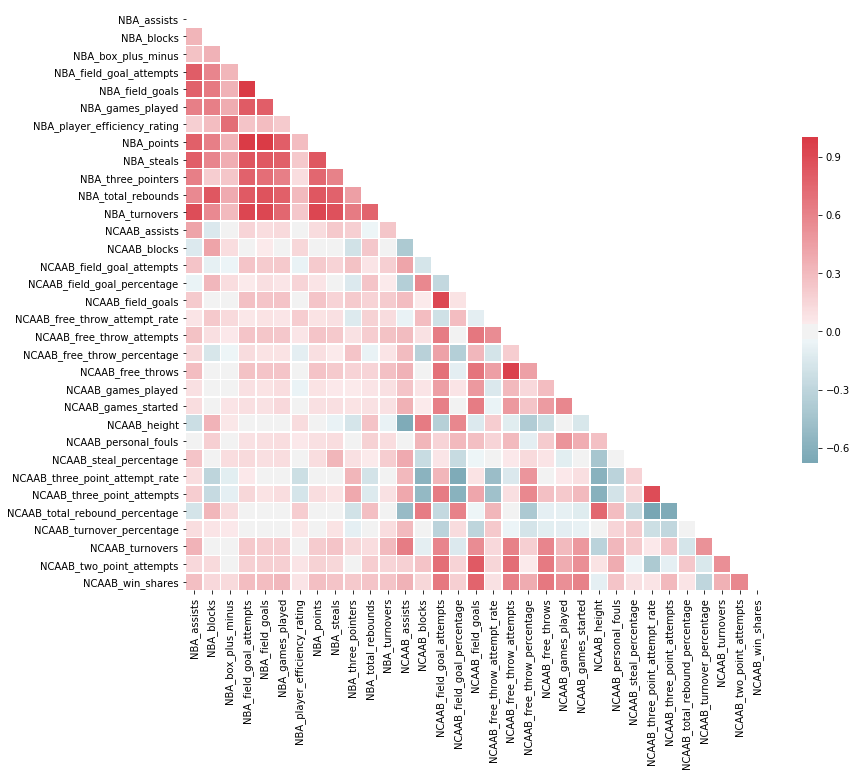

In [185]:
f, ax = plt.subplots(figsize=(13, 12))
sns.heatmap(corr, cmap=cmap, mask=mask, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});